In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

C:\Users\kangh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
bankdata_train = pd.read_csv('Desktop/bank-full.csv')
bankdata_test = pd.read_csv('Desktop/bank.csv')

In [3]:
bankdata_train = bankdata_train.drop('poutcome',axis = 1)

In [4]:
bankdata_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


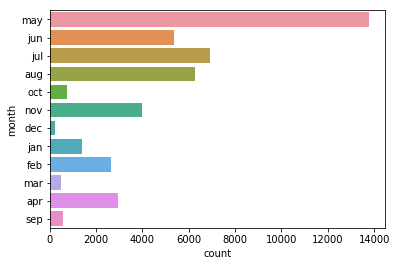

In [5]:
sns.countplot(y = 'month',data=bankdata_train)

In [6]:
dummy = pd.get_dummies(bankdata_train[['marital','education','job','default','housing','loan','contact','month','day']])

In [7]:
bank = pd.concat([bankdata_train, dummy], axis=1)

In [8]:
bank = bank.drop(['marital','education','job','default','housing','loan','contact','month','day'],axis = 1)

In [36]:
X = bank.loc[: ,bank.columns != 'y']
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
print(confusion_matrix)

[[11664   305]
 [ 1151   444]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

             precision    recall  f1-score   support

         no       0.91      0.97      0.94     11969
        yes       0.59      0.28      0.38      1595

avg / total       0.87      0.89      0.88     13564

